<a href="https://colab.research.google.com/github/VAMSHINEELAMMA/SAMSUNG-INNOVATION-CAMPUS/blob/main/LSTM_to_predict_Tata_Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
# Load dataset
datafile = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")


In [3]:

# Display basic info
datafile.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
datafile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:

# Extract the "Open" column for training
datafile = datafile.iloc[:, 1:2].values


In [6]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
datafile_scaled = scaler.fit_transform(datafile)


In [7]:

# Prepare training data
X_train, y_train = [], []
for index in range(60, len(datafile_scaled)):
    X_train.append(datafile_scaled[index-60:index, 0])
    y_train.append(datafile_scaled[index, 0])


In [8]:

X_train, y_train = np.array(X_train), np.array(y_train)


In [9]:

# Reshape input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [10]:

# Build LSTM model
regressor = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
regressor.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:

# Train the model
regressor.fit(X_train, y_train, epochs=10, batch_size=10)


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 33s 99ms/step - loss: 0.0106
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0034
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - loss: 0.0025
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 0.0026
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - loss: 0.0019
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0021
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - loss: 0.0019
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - loss: 0.0016
Epoch 9/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 0.0018
Epoch 10/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - loss: 0.0018


In [14]:

# Load test data
testset = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')


In [15]:
real_stock_price = testset.iloc[:, 1:2].values


In [16]:

# Prepare test inputs
combined_data = np.concatenate((datafile, real_stock_price), axis=0)


In [17]:
inputs = combined_data[len(combined_data) - len(real_stock_price) - 60:]


In [18]:
inputs = inputs.reshape(-1, 1)


In [19]:
inputs = scaler.transform(inputs)


In [20]:

# Prepare X_test
X_test = []
for index in range(60, len(inputs)):
    X_test.append(inputs[index-60:index, 0])


In [21]:
X_test = np.array(X_test)


In [22]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
# Predict stock prices
predictions = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


In [24]:
predicted_stock_price = scaler.inverse_transform(predictions)

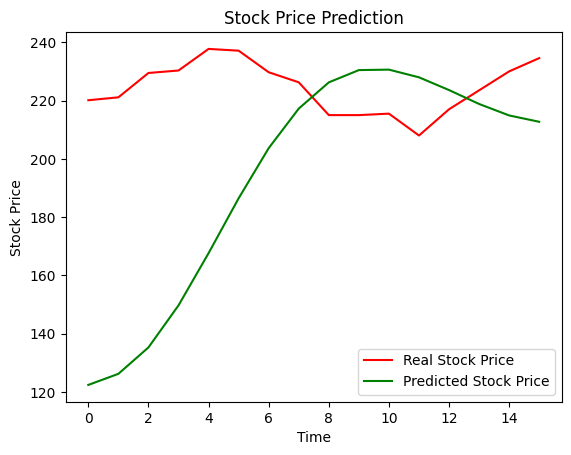

In [25]:
# Plot results
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
